In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("boston_housing.csv")
print("Dataset Loaded Successfully.")
print(df.head())

Dataset Loaded Successfully.
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [20]:
df.shape

(506, 14)

In [22]:
df.size

7084

In [24]:
x= df.drop("MEDV", axis=1)
y= df["MEDV"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [30]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train_scaled.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1)
])

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [34]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 581.6823 - mae: 22.3112 - val_loss: 512.0628 - val_mae: 21.1190
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 594.9062 - mae: 22.1771 - val_loss: 462.7690 - val_mae: 19.9755
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 494.1800 - mae: 20.4243 - val_loss: 396.3041 - val_mae: 18.3420
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 457.3911 - mae: 19.2479 - val_loss: 310.6568 - val_mae: 16.0516
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 314.2797 - mae: 15.6605 - val_loss: 214.7735 - val_mae: 13.1257
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 218.6437 - mae: 12.7031 - val_loss: 126.4627 - val_mae: 9.5853
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 133.3302 - mae: 9.4790 - val_loss: 68.7207 - val_mae: 6.3205
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.5512 - mae: 6.1857 - val_loss: 45.4718 - val_mae: 4.7668
Epoch 9/100
11/11 ━━━━━

In [36]:
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=2)
print(f"Test Mean Absolute Error: {mae:.2f}")

4/4 - 0s - 13ms/step - loss: 11.4406 - mae: 2.2881
Test Mean Absolute Error: 2.29


In [40]:
loss

11.440628051757812

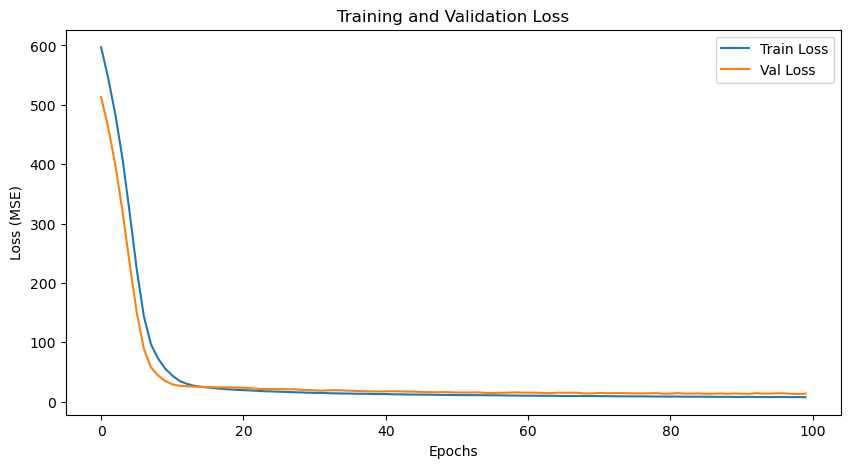

In [49]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()